## MSDS 432 - Programming Assignment #2 Dan Avni

## Executive Summary

The purpose of this programming assignment is to provide a "real-world" demonstration of the runtime growth of a poor performing sort algorithm such as selection sort, a naïve algorithm that scans the data, looking for the smallest or largest item, depending on the desired sort order, and places that item in the appropriate location, swapping it with the item that previously occupied that slot. 

In Big O notation the worst-case performance of that selection sort algorithm is O(n^2) with n being the dataset size. 
While the selection sort algorithm is easy to implement and requires little overhead in terms of memory, several more efficient algorithms exist. A general-purpose algorithm such as merge or quick sort can accomplish an O(n*log(n)) runtime, which in practical sense can make the difference between a feasible and infeasible solution. With some assumptions about data distribution, some algorithms can deliver an O(n) as well.

Therefore, it is not generally recommended to use a selection sort algorithm, unless the data size is modest, and simplicity is preferred over runtime performance.


## Method and Conclusions

To demonstrate the selection sort algorithm performance, we prepared 20 data arrays with various lengths and data types including random, uniformly distributed data. 

The available lengths were 5,000, 10,000, 15,000, 20,000, and 25,000 elements, and the data types included integers ranging from 0 to 10000, decimal representing a floating-point number between -1 and 1, random character string of length 5 and 15.

With the random data in hand, we conducted the selection sort algorithm and captured the runtime performance in milliseconds using the elapsed clock time.  
While we did not produce an actual exponential growth pattern, the charts suggest a non-linear increase in runtime. 
Below is a plot of a sample runtime result study. We note that the runtime for str15 was the highest likely due to longer time to compare and swap the items, followed by str5. The integer and decimal sorts performed comparability, since the compare and swap operations for small numeric values can be performed extremely efficiently by modern CPUs.

The below chart shows the complete results. A table with the same data is provided below. Furthermore, we note that the actual results fluctuated between runs as the effect of competing tasks (noise) occasionally exceeded the measured effect (signal). We would like to repeat this test in an insulated environment as well as randomize the calls order.

<img src="./runtime.png">

## Implementation

In [1]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import string
import random

In [2]:
# selection sort implemntation retrieved from:
# https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_selection_sort.py

# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

In [3]:
#unit test validation of the selection sort implementation
print(selectionSort([5, 3, 6, 2, 10]))
print(selectionSort(['a', 'za', 'c', 'zz', '0']))

[2, 3, 5, 6, 10]
['0', 'a', 'c', 'za', 'zz']


In [4]:
#utility function to generate and array of uniformly distributed data array with persistent seed across calls 
def generate_random_array(data_type, item_count, low=0, high=10000):
    np.random.seed(666)
    
    if data_type == 'integer':
        return np.random.randint(low, high, item_count).tolist()
    if data_type == 'str5':
        return  [''.join(random.choices(string.ascii_letters, k = 5)) for _ in range(item_count)]
    if data_type == 'str15':
        return  [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(item_count)]
    if data_type == 'decimal':
        return  np.random.uniform(-1, 1, item_count).tolist()
        
    return None

In [5]:
#prepare an array of all the desired data lengths
test_data_len_list  = [5000, 10000, 15000, 20000, 25000]
test_data_types     = ['integer', 'decimal', 'str5', 'str15']

#prepare an empty data frame with the desired column names
test_data_col_names = ['length', 'data_type', 'sort_ms']
test_data           = pd.DataFrame(columns = test_data_col_names) 

In [6]:
#iterate over the possible lens, create test data for each length, and compture runtime length in milliseconds
for test_data_len in test_data_len_list:
    for test_data_type in test_data_types:
        data = generate_random_array(test_data_type, test_data_len)
    
        start   = time.time()
        data    = selectionSort(data)
        sort_ms = (time.time() - start) * 1000

        #insert the results into a new dataframe record 
        test_data.loc[len(test_data)] = [test_data_len, test_data_type, sort_ms]

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [7]:
#plain text data dump of the test results
test_data

,length,data_type,sort_ms
0,5000,integer,982.356548
1,5000,decimal,1453.436852
2,5000,str5,2287.502766
3,5000,str15,1483.291864
4,10000,integer,6315.949678
5,10000,decimal,6655.458212
6,10000,str5,8352.225065
7,10000,str15,6653.680086
8,15000,integer,14612.576723
9,15000,decimal,13553.956032


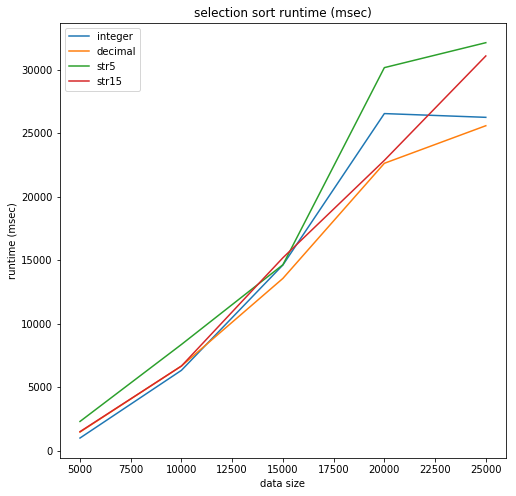

In [8]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,8))

for test_data_type in test_data_types:
    plt.plot(
        test_data[test_data.data_type==test_data_type].length, 
        test_data[test_data.data_type==test_data_type].sort_ms, label = test_data_type)

plt.legend()
plt.xlabel('data size')
plt.ylabel('runtime (msec)')
plt.title('selection sort runtime (msec)')
plt.show()

## Extra Credit

A GitHub reposotory contaning commits for all the maerials in the assignemt was shared and made available here:

https://github.com/dannyavni/MSDS_432